In [1]:
import pandas as pd

In [2]:
from sqlite3 import connect

In [3]:
opsim_db = connect('baseline_v2.0_10yrs.db')

In [4]:
opsim_file = pd.read_sql('select * from observations limit 1000', opsim_db)

In [5]:
opsim_file.columns

Index(['observationId', 'fieldRA', 'fieldDec', 'observationStartMJD',
       'flush_by_mjd', 'visitExposureTime', 'filter', 'rotSkyPos',
       'numExposures', 'airmass', 'seeingFwhm500', 'seeingFwhmEff',
       'seeingFwhmGeom', 'skyBrightness', 'night', 'slewTime', 'visitTime',
       'slewDistance', 'fiveSigmaDepth', 'altitude', 'azimuth', 'paraAngle',
       'cloud', 'moonAlt', 'sunAlt', 'note', 'fieldId', 'proposalId',
       'block_id', 'observationStartLST', 'rotTelPos', 'moonAz', 'sunAz',
       'sunRA', 'sunDec', 'moonRA', 'moonDec', 'moonDistance', 'solarElong',
       'moonPhase', 'cummTelAz'],
      dtype='object')

In [6]:
'observationId', 'fieldRA', 'fieldDec', 'observationStartMJD', 'fieldId', 'filter', 'fiveSigmaDepth'

('observationId',
 'fieldRA',
 'fieldDec',
 'observationStartMJD',
 'fieldId',
 'filter',
 'fiveSigmaDepth')

In [7]:
band_obs = pd.read_sql_query('SELECT observationId, fieldRA, fieldDec, observationStartMJD, fieldId, filter, fiveSigmaDepth FROM observations', opsim_db)

In [8]:
band_obs

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth
0,0,310.024480,-60.812928,60218.001806,-1,y,22.370557
1,1,310.601871,-63.561425,60218.002254,-1,y,22.338327
2,2,311.292611,-66.317774,60218.002703,-1,y,22.295487
3,3,312.140731,-69.082666,60218.003152,-1,y,21.270421
4,4,304.170163,-73.375442,60218.003624,-1,y,21.205276
...,...,...,...,...,...,...,...
2086975,2086975,338.528926,-55.399555,63870.104267,-1,y,21.917628
2086976,2086976,347.380828,-54.922128,63870.104758,-1,y,21.864586
2086977,2086977,350.974688,-52.986827,63870.105219,-1,y,21.871581
2086978,2086978,356.062503,-53.778759,63870.105677,-1,y,21.850527


In [9]:
import matplotlib.pyplot as plt
%matplotlib Inline

Text(0, 0.5, 'DEC')

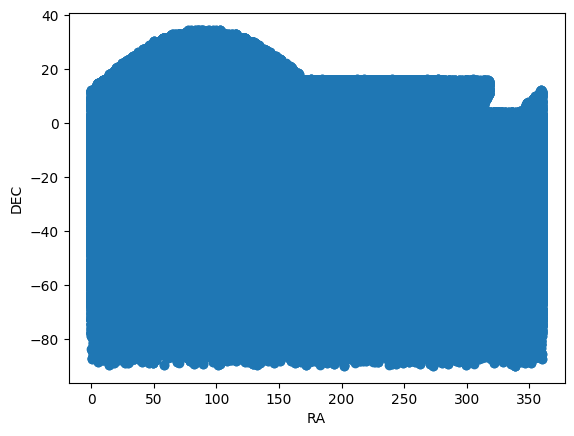

In [10]:
plt.scatter(band_obs['fieldRA'], band_obs['fieldDec'])
plt.xlabel('RA')
plt.ylabel('DEC')

In [11]:
import matplotlib as npl

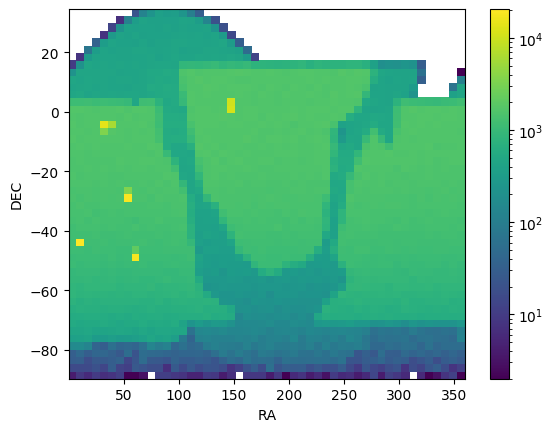

In [12]:
plt.hist2d(band_obs['fieldRA'], band_obs['fieldDec'], bins = 50, norm=npl.colors.LogNorm())
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

In [13]:
import numpy as np

In [14]:
find_max_RA = np.max(band_obs['fieldRA'])
find_min_RA = np.min(band_obs['fieldRA'])
find_max_DEC = np.max(band_obs['fieldDec'])
find_min_DEC = np.min(band_obs['fieldDec'])
num_bins = 50

In [15]:
RA_set = np.linspace(find_min_RA, find_max_RA, num_bins+1)
DEC_set = np.linspace(find_min_DEC, find_max_DEC, num_bins+1)

In [16]:
RA_bins = np.digitize(band_obs['fieldRA'], RA_set, right=True)
RA_bins

array([44, 44, 44, ..., 49, 50, 49])

In [17]:
DEC_bins = np.digitize(band_obs['fieldDec'], DEC_set, right=True)
DEC_bins

array([12, 11, 10, ..., 15, 15, 14])

In [18]:
band_obs['RABins'] = RA_bins
band_obs['DECBins'] = DEC_bins

In [19]:
new_field_id = (RA_bins-1) * 50 + DEC_bins
band_obs['fieldId'] = new_field_id
band_obs

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth,RABins,DECBins
0,0,310.024480,-60.812928,60218.001806,2162,y,22.370557,44,12
1,1,310.601871,-63.561425,60218.002254,2161,y,22.338327,44,11
2,2,311.292611,-66.317774,60218.002703,2160,y,22.295487,44,10
3,3,312.140731,-69.082666,60218.003152,2159,y,21.270421,44,9
4,4,304.170163,-73.375442,60218.003624,2107,y,21.205276,43,7
...,...,...,...,...,...,...,...,...,...
2086975,2086975,338.528926,-55.399555,63870.104267,2364,y,21.917628,48,14
2086976,2086976,347.380828,-54.922128,63870.104758,2415,y,21.864586,49,15
2086977,2086977,350.974688,-52.986827,63870.105219,2415,y,21.871581,49,15
2086978,2086978,356.062503,-53.778759,63870.105677,2465,y,21.850527,50,15


In [20]:
np.max(band_obs['fieldId'])

2492

In [21]:
r_filter = band_obs.query('fieldId == 2403 and filter == "r"')
g_filter = band_obs.query('fieldId == 2403 and filter == "g"')
print(r_filter, g_filter)

         observationId     fieldRA   fieldDec  observationStartMJD  fieldId  \
772                772  349.857034 -82.633511         60218.357890     2403   
846124          846124  349.132762 -83.345848         61682.142242     2403   
860288          860288  349.770490 -84.147058         61703.077226     2403   
1680668        1680668  349.123067 -82.933787         63159.185750     2403   
1875208        1875208  346.865503 -83.230118         63536.152786     2403   

        filter  fiveSigmaDepth  RABins  DECBins  
772          r       22.115278      49        3  
846124       r       23.833470      49        3  
860288       r       23.336416      49        3  
1680668      r       23.423731      49        3  
1875208      r       23.918868      49        3            observationId     fieldRA   fieldDec  observationStartMJD  fieldId  \
1259256        1259256  351.795196 -83.451359         62442.066218     2403   
1478871        1478871  346.629750 -83.641666         62802.056051 

In [22]:
r_filter

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth,RABins,DECBins
772,772,349.857034,-82.633511,60218.357890,2403,r,22.115278,49,3
846124,846124,349.132762,-83.345848,61682.142242,2403,r,23.833470,49,3
860288,860288,349.770490,-84.147058,61703.077226,2403,r,23.336416,49,3
1680668,1680668,349.123067,-82.933787,63159.185750,2403,r,23.423731,49,3
1875208,1875208,346.865503,-83.230118,63536.152786,2403,r,23.918868,49,3


In [23]:
g_filter

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth,RABins,DECBins
1259256,1259256,351.795196,-83.451359,62442.066218,2403,g,24.005959,49,3
1478871,1478871,346.629750,-83.641666,62802.056051,2403,g,23.803613,49,3
1680618,1680618,349.123067,-82.933787,63159.161138,2403,g,23.770814,49,3


In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = 'data/lsst_baseline_throughputs'

!ls $fdir

LSSTfilters.png  filter_g.dat  hardware_g.dat  lens1.dat  total_g.dat
README.md	 filter_i.dat  hardware_i.dat  lens2.dat  total_i.dat
atmos_10.dat	 filter_r.dat  hardware_r.dat  lens3.dat  total_r.dat
atmos_std.dat	 filter_u.dat  hardware_u.dat  m1.dat	  total_u.dat
darksky.dat	 filter_y.dat  hardware_y.dat  m2.dat	  total_y.dat
detector.dat	 filter_z.dat  hardware_z.dat  m3.dat	  total_z.dat


In [25]:
fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = 'data/lsst_baseline_throughputs'

!ls $fdir

LSSTfilters.png  filter_g.dat  hardware_g.dat  lens1.dat  total_g.dat
README.md	 filter_i.dat  hardware_i.dat  lens2.dat  total_i.dat
atmos_10.dat	 filter_r.dat  hardware_r.dat  lens3.dat  total_r.dat
atmos_std.dat	 filter_u.dat  hardware_u.dat  m1.dat	  total_u.dat
darksky.dat	 filter_y.dat  hardware_y.dat  m2.dat	  total_y.dat
detector.dat	 filter_z.dat  hardware_z.dat  m3.dat	  total_z.dat


In [26]:
import rubin_sim.photUtils.Bandpass as Bandpass
import rubin_sim.photUtils.Sed as Sed

In [27]:
sun = Sed()
sun.readSED_flambda('data/sed_templates/CWW_KINNEY/CWW_E_ext.sed')
sun.wavelen/=10

In [28]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']

lsst = {}
for f in filterlist:
    lsst[f] = Bandpass()
    lsst[f].readThroughput(os.path.join(fdir, f'total_{f}.dat'))
    
mags = {}
for f in filterlist:
    mags[f] = sun.calcMag(lsst[f])

# Make a dataframe just to get a nice output cell.
pd.DataFrame(mags, index=['Sun']).T

,Sun
u,-4.150003
g,-5.896804
r,-6.622219
i,-6.974888
z,-7.233845
y,-7.425142


In [29]:
r = 20.0

fluxNorm = sun.calcFluxNorm(r, lsst['r'])

sun.multiplyFluxNorm(fluxNorm)

mags = {}
for f in filterlist:
    mags[f] = sun.calcMag(lsst[f])
    
pd.DataFrame(mags, index=['Distant Sun']).T

,Distant Sun
u,22.472216
g,20.725415
r,20.000000
i,19.647330
z,19.388374
y,19.197076


In [30]:
from rubin_sim.photUtils import SignalToNoise
from rubin_sim.photUtils import PhotometricParameters

In [31]:
SignalToNoise.calcMagError_m5(magnitude=20, bandpass=lsst['r'], m5=24, photParams=PhotometricParameters())
SignalToNoise.calcMagError_m5(magnitude=20.725415, bandpass=lsst['g'], m5=24, photParams=PhotometricParameters())

(0.013139422508835895, 0.03934261437469505)

In [32]:
mag_error_r, gamma = SignalToNoise.calcMagError_m5(20, lsst['r'], 22.115278, PhotometricParameters())
mag_error_2r, gamma = SignalToNoise.calcMagError_m5(20, lsst['r'], 23.833470, PhotometricParameters())
print(mag_error_r)
print(mag_error_2r)

0.031221444804164934
0.009322245115585407


In [33]:
mag_error_g, gamma = SignalToNoise.calcMagError_m5(20.725415, lsst['g'], 23.803613 , PhotometricParameters())
mag_error_2g, gamma = SignalToNoise.calcMagError_m5(20.725415, lsst['g'], 24.005959, PhotometricParameters())
print(mag_error_g, mag_error_2g)

0.014857161547721024 0.013093479367888855


In [34]:
mag_2 = 20
mag_1 = 20.725415
def combine_col_err(mag_1, mag_2, err_1, err_2):
    return mag_1-mag_2, np.sqrt(mag_error_g**2 + mag_error_r**2)

In [35]:
gmr_error = combine_col_err(mag_1, mag_2, mag_error_g, mag_error_r)

In [36]:
gmr_error


(0.7254150000000017, 0.0345762037377529)

In [37]:
def coaddM5Value(dataframe):
    colname = 'fiveSigmaDepth'
    return 1.25 * np.log10(np.sum(10.0 ** (0.8 * dataframe[colname])))

In [38]:
r_filter['fiveSigmaDepth']

772        22.115278
846124     23.833470
860288     23.336416
1680668    23.423731
1875208    23.918868
Name: fiveSigmaDepth, dtype: float64

In [39]:
coaddM5Value(r_filter)

24.444680387674623

In [40]:
g_filter['fiveSigmaDepth']

1259256    24.005959
1478871    23.803613
1680618    23.770814
Name: fiveSigmaDepth, dtype: float64

In [41]:
coaddM5Value(g_filter)

24.466854221562045

In [42]:
from scipy.stats import norm
from copy import copy
g_r = []
g_r_err = []
pdf_list = []
r = 24.5
for redshift in np.arange(0,3.1,0.1):
    sun_copy = copy(sun)
    sun_copy.redshiftSED(redshift)
    mags = {}
    fluxNorm = sun_copy.calcFluxNorm(r, lsst['r'])
    sun_copy.multiplyFluxNorm(fluxNorm)
    mags = {}
    for f in filterlist:
        mags[f] = sun_copy.calcMag(lsst[f])
        pd.DataFrame(mags, index=['Distant Sun']).T
    gr_color = mags['g'] - mags['r']
    g_r.append(mags['g'] - mags['r'])
    mag_error_g, gamma = SignalToNoise.calcMagError_m5(mags['g'], lsst['g'], coaddM5Value(g_filter), PhotometricParameters())
    mag_error_r, gamma = SignalToNoise.calcMagError_m5(mags['r'], lsst['r'], coaddM5Value(r_filter), PhotometricParameters())
    g_r_err.append(np.sqrt(mag_error_r**2 + mag_error_g**2))
    gr_error = np.sqrt(mag_error_r**2 + mag_error_g**2)
    pdf_list.append(norm(loc = gr_color, scale = gr_error))
    
print(g_r, g_r_err)

[0.7254152168005632, 0.9092875263745306, 1.21556563554606, 1.5101335745430582, 1.7336961338800663, 1.6247841723966872, 1.564944229071827, 1.6311809361247, 1.8812287964095908, 2.127568839165825, 2.2677011843884642, 2.1867075250048273, 1.8528072436778764, 1.4936730257263982, 1.1240496109998404, 0.8557468597614317, 0.7198391764086622, 0.7096387142844485, 0.747772632412822, 0.7750666481098385, 0.7663830025511693, 0.7227059844917534, 0.6590263915621257, 0.5962345500838815, 0.5445307149382153, 0.508888128898807, 0.4915751575070537, 0.4913180779593205, 0.5034478075371531, 0.5257928424279541, 0.5554684677789687] [0.41982945529855176, 0.46880636273545284, 0.5672143322905607, 0.6827928974753288, 0.7846200282200531, 0.7334844711047271, 0.7066253818004171, 0.7364075459670827, 0.8585062123977024, 0.9935506488594374, 1.0767193423893164, 1.0280989667680123, 0.8438610074007439, 0.6757790343834338, 0.5355349503526275, 0.45378819735732756, 0.41845711583359857, 0.4159634584629582, 0.4253974729530458, 0.4

In [43]:
# g_r_err on x-axis, g_r on y-axis

Text(0, 0.5, 'Color')

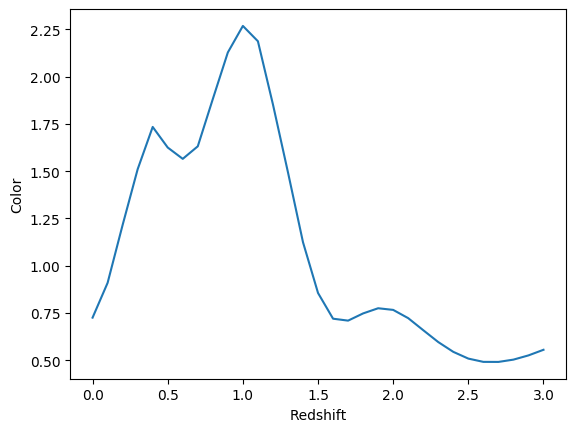

In [44]:
redshift_r = np.arange(0,3.1,0.1)
plt.plot(redshift_r, g_r)
plt.xlabel("Redshift")
plt.ylabel("Color")

In [45]:
g_r[0], g_r_err[0]

(0.7254152168005632, 0.41982945529855176)

In [46]:
gal_z_0 = norm(loc=g_r[0], scale=g_r_err[0])
gal_z_0p5 = norm(loc=g_r[5], scale=g_r_err[5])
gal_z_1p0 = norm(loc=g_r[10], scale=g_r_err[10])

In [47]:
np.min(g_r), np.max(g_r)

(0.4913180779593205, 2.2677011843884642)

In [48]:
color_range = np.arange(-4,10, 0.01)

In [49]:
def combine_pdfs(pdf_list_in, color_range_in):
    
    combined_pdf_out = np.zeros(len(color_range_in))
    for galaxy in pdf_list_in:
        combined_pdf_out += galaxy.pdf(color_range_in) 
    combined_pdf_out /= len(pdf_list_in)
    
    return combined_pdf_out

In [50]:
combined_pdf = combine_pdfs(pdf_list, color_range)

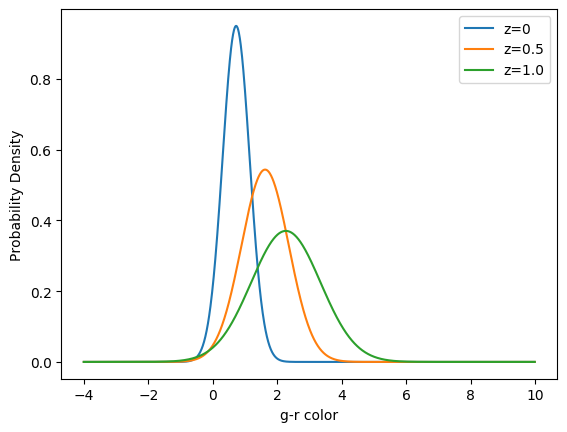

In [51]:
plt.plot(color_range, pdf_list[0].pdf(color_range), label = 'z=0')
plt.plot(color_range, pdf_list[5].pdf(color_range), label = 'z=0.5')
plt.plot(color_range, pdf_list[10].pdf(color_range), label = 'z=1.0')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

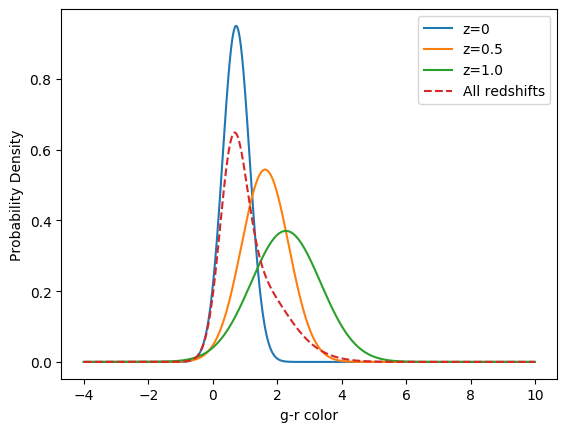

In [52]:
plt.plot(color_range, gal_z_0.pdf(color_range), label = 'z=0')
plt.plot(color_range, gal_z_0p5.pdf(color_range), label = 'z=0.5')
plt.plot(color_range, gal_z_1p0.pdf(color_range), label = 'z=1.0')
plt.plot(color_range, combined_pdf, '--', label = 'All redshifts')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

In [53]:
from scipy.special import kl_div, rel_entr

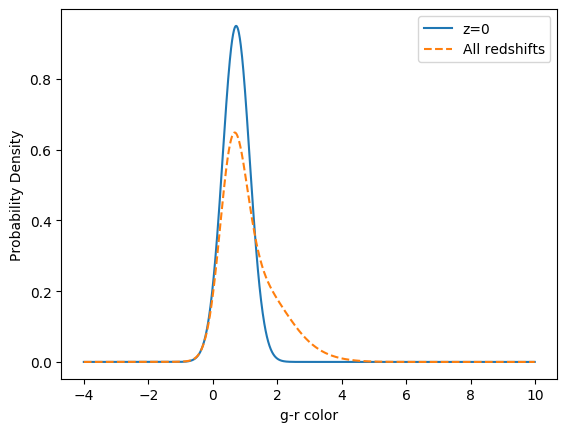

In [54]:
plt.plot(color_range, gal_z_0.pdf(color_range), label = 'z=0')
#plt.plot(color_range, gal_z_0p5.pdf(color_range), label = 'z=0.5')
#plt.plot(color_range, gal_z_1p0.pdf(color_range), label = 'z=1.0')
plt.plot(color_range, combined_pdf, '--', label = 'All redshifts')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

In [55]:
np.sum(combined_pdf)*.01

0.9999999998695893

In [56]:
np.sum(0.01*gal_z_0.pdf(color_range)*0.01)

0.010000000000000215

In [57]:
np.sum(kl_div(0.01*gal_z_0.pdf(color_range), 0.01*combined_pdf))

0.2268193348755385

In [58]:
kl_by_redshift = []
for gal in pdf_list:
    kl_by_redshift.append(np.sum(kl_div(0.01*gal.pdf(color_range), 0.01*combined_pdf)))

In [59]:
np.mean(kl_by_redshift)

0.3470825377581646

In [60]:
np.argmin(kl_by_redshift), np.argmax(kl_by_redshift)

(1, 10)

In [61]:
np.min(kl_by_redshift), np.max(kl_by_redshift)

(0.17511799994185065, 0.771215043373735)

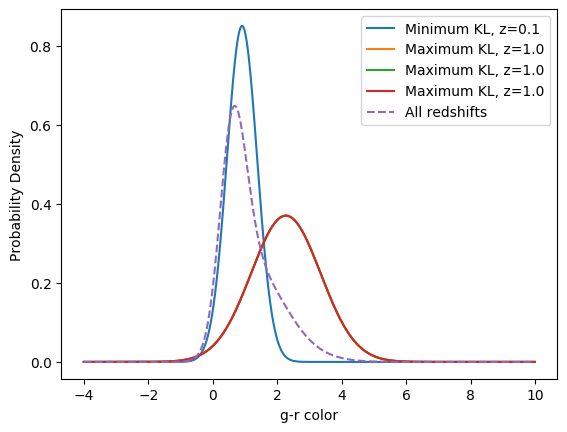

In [62]:
plt.plot(color_range, pdf_list[1].pdf(color_range), label = 'Minimum KL, z=0.1')
plt.plot(color_range, pdf_list[10].pdf(color_range), label = 'Maximum KL, z=1.0')
plt.plot(color_range, pdf_list[10].pdf(color_range), label = 'Maximum KL, z=1.0')
plt.plot(color_range, pdf_list[10].pdf(color_range), label = 'Maximum KL, z=1.0')
#plt.plot(color_range, gal_z_0p5.pdf(color_range), label = 'z=0.5')
#plt.plot(color_range, gal_z_1p0.pdf(color_range), label = 'z=1.0')
plt.plot(color_range, combined_pdf, '--', label = 'All redshifts')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

# Demonstration of relationship between KL-divergence and Redshift Estimation

Here I'm going to show how the KL-divergence we calculate and the location of the color PDFs is related to how well we can estimate photometric redshifts.

**Note: I extended the color range above to go all the way to 10 instead of 8**

In [63]:
from scipy.stats import norm
from copy import copy
g_r = []
g_r_err = []
pdf_list = []
r = 24.5
for redshift in np.arange(0,3.1,0.1):
    sun_copy = copy(sun)
    sun_copy.redshiftSED(redshift)
    mags = {}
    fluxNorm = sun_copy.calcFluxNorm(r, lsst['r'])
    sun_copy.multiplyFluxNorm(fluxNorm)
    mags = {}
    for f in filterlist:
        mags[f] = sun_copy.calcMag(lsst[f])
        pd.DataFrame(mags, index=['Distant Sun']).T
    gr_color = mags['g'] - mags['r']
    g_r.append(mags['g'] - mags['r'])
    mag_error_g, gamma = SignalToNoise.calcMagError_m5(mags['g'], lsst['g'], coaddM5Value(g_filter), PhotometricParameters())
    mag_error_r, gamma = SignalToNoise.calcMagError_m5(mags['r'], lsst['r'], coaddM5Value(r_filter), PhotometricParameters())
    g_r_err.append(np.sqrt(mag_error_r**2 + mag_error_g**2))
    gr_error = np.sqrt(mag_error_r**2 + mag_error_g**2)
    pdf_list.append(norm(loc = gr_color, scale = gr_error))
    
print(g_r, g_r_err)

[0.7254152168005632, 0.9092875263745306, 1.21556563554606, 1.5101335745430582, 1.7336961338800663, 1.6247841723966872, 1.564944229071827, 1.6311809361247, 1.8812287964095908, 2.127568839165825, 2.2677011843884642, 2.1867075250048273, 1.8528072436778764, 1.4936730257263982, 1.1240496109998404, 0.8557468597614317, 0.7198391764086622, 0.7096387142844485, 0.747772632412822, 0.7750666481098385, 0.7663830025511693, 0.7227059844917534, 0.6590263915621257, 0.5962345500838815, 0.5445307149382153, 0.508888128898807, 0.4915751575070537, 0.4913180779593205, 0.5034478075371531, 0.5257928424279541, 0.5554684677789687] [0.41982945529855176, 0.46880636273545284, 0.5672143322905607, 0.6827928974753288, 0.7846200282200531, 0.7334844711047271, 0.7066253818004171, 0.7364075459670827, 0.8585062123977024, 0.9935506488594374, 1.0767193423893164, 1.0280989667680123, 0.8438610074007439, 0.6757790343834338, 0.5355349503526275, 0.45378819735732756, 0.41845711583359857, 0.4159634584629582, 0.4253974729530458, 0.4

In [64]:
combined_pdf = combine_pdfs(pdf_list, color_range)

In [65]:
kl_by_redshift = []
for gal in pdf_list:
    kl_by_redshift.append(np.sum(kl_div(0.01*gal.pdf(color_range), 0.01*combined_pdf)))

### Create a simulated dataset at r=24.5

First I'm going to use our PDFs from the work above calculated with an r-magnitude of 24.5 and the coadded m5 values from the fields above to create a set of simulated galaxy colors. To do this I will sample 1000 galaxies from each of the PDFs we calculated for each redshift.

The PDFs are all plotted here and the combined PDF that represents the probability across all redshifts is shown.

Text(0.5, 1.0, 'PDFs at all redshifts and the combined PDF')

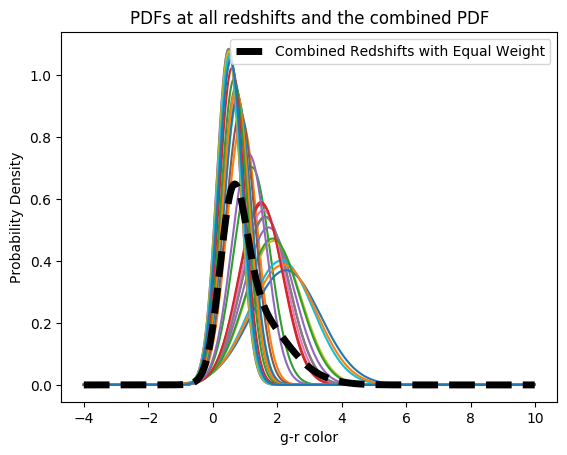

In [66]:
for gal in pdf_list:
    plt.plot(color_range, gal.pdf(color_range))# label = 'Minimum KL, z=1.4')
#plt.plot(color_range, gal_z_0p5.pdf(color_range), label = 'z=0.5')
#plt.plot(color_range, gal_z_1p0.pdf(color_range), label = 'z=1.0')
plt.plot(color_range, combined_pdf, '--', c='k', lw=5, label='Combined Redshifts with Equal Weight')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()
plt.title('PDFs at all redshifts and the combined PDF')

Here is an example of drawing 1000 galaxies from the z=0 PDF and showing how it matches the distribution.

In [67]:
# From each redshifted galaxy draw 1000 samples
gal_colors = pdf_list[0].rvs(1000)

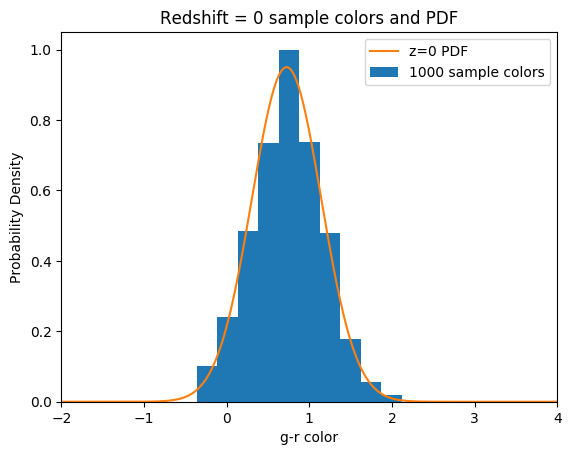

In [68]:
plt.hist(gal_colors, density=True, label='1000 sample colors') # Density=True turns the histogram into a PDF by normalizing the values
plt.plot(color_range, pdf_list[0].pdf(color_range), label='z=0 PDF')
plt.xlim(-2, 4)
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.title('Redshift = 0 sample colors and PDF')
plt.legend()

Now I will do it for all the redshifts and plot the results compared to our combined PDF calculated during class.

In [69]:
redshifted_colors = []
true_redshifts = []
known_redshifts = np.arange(0, 3.01, 0.1)
for gal, redshift in zip(pdf_list, known_redshifts):
    gal_colors = gal.rvs(1000)
    redshifted_colors.append(gal_colors)
    true_redshifts.append(np.ones(1000)*redshift)
true_redshift = np.array(true_redshifts).flatten()
redshifted_colors = np.array(redshifted_colors).flatten()

Text(0.5, 1.0, 'Sample Catalog and PDF compared')

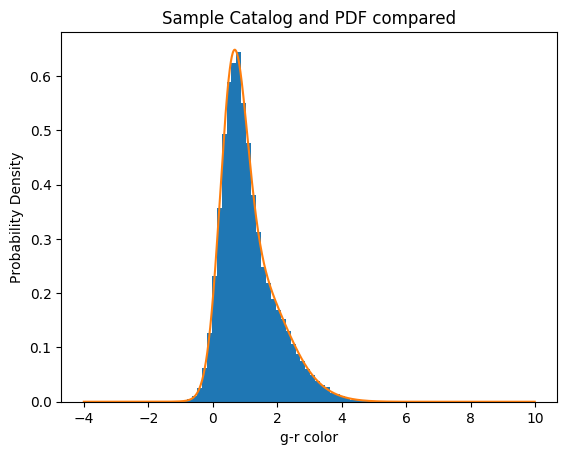

In [70]:
plt.hist(redshifted_colors, density=True, bins=50, label='Sample catalog of colors')
plt.plot(color_range, combined_pdf, label='Combined PDF')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.title('Sample Catalog and PDF compared')

What does this catalog look like by redshift?

Let's plot all the colors at the different redshifts and see.

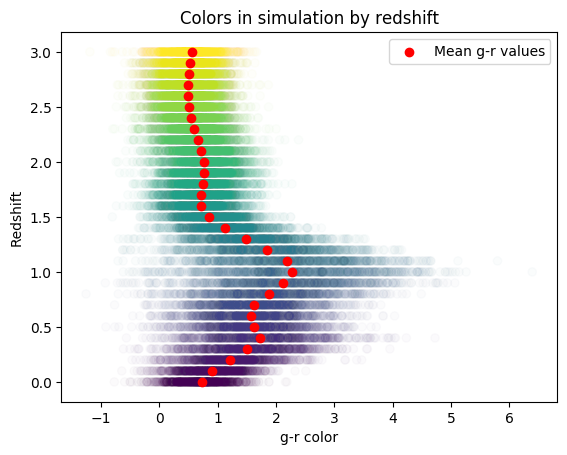

In [71]:
cm = plt.cm.get_cmap('viridis')
for idx, redshift in enumerate(np.arange(0, 3.01, 0.1)):
    sc = plt.scatter(redshifted_colors[idx*1000:(idx+1)*1000], np.ones(1000)*redshift, vmin=0, vmax=3.0, alpha=0.02, c=np.ones(1000)*redshift, cmap=cm)
#plt.colorbar(sc, label='Redshift', alpha=1.0)
plt.scatter(g_r, known_redshifts, c='r', label='Mean g-r values')
#plt.colorbar(sc, label='Redshift', alpha=1.0)
plt.xlabel('g-r color')
plt.ylabel('Redshift')
plt.title('Colors in simulation by redshift')
plt.legend()

Notice how some distributions have some areas in color space (the x-axis) where there are fewer other redshifts with colors in that area? Particularly looking at redshifts around 1.0 there are some more positive values that are pretty common at those redshifts but nowhere else. Keep this in mind as we continue on.

## Run a simple photometric redshift estimation

We have talked about how one way to do photo-z is to find the nearest neighbor in color space to a galaxy with a known redshift (where the known redshift comes from spectroscopic measurement). So here we will take the mean g-r color for each redshift and say this is our catalog of colors with a known redshift. Then for each color in our simulated catalog we will assign it an estimated photometric redshift by finding the closest "known redshift" to it.

In [72]:
# Set up our nearest neighbor estimator
from sklearn.neighbors import NearestNeighbors
redshift_estimator = NearestNeighbors(n_neighbors=1).fit(np.array(g_r).reshape(-1, 1))

In [73]:
# Find the nearest "known redshift" color neighbor to each sample galaxy in our catalog
measured_redshift = []
estimated_idx = redshift_estimator.kneighbors(redshifted_colors.reshape(-1, 1), return_distance=False)
measured_redshift = np.array([known_redshifts[idx] for idx in estimated_idx]).flatten()

Text(0.5, 1.0, 'True vs Estimated Redshift')

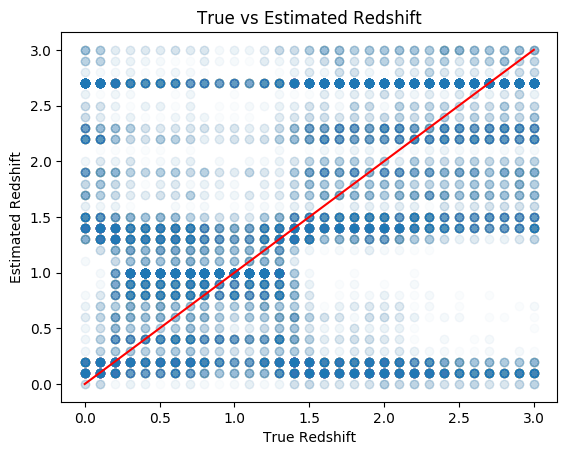

In [74]:
plt.scatter(true_redshift, measured_redshift, alpha=0.02)
plt.plot(np.arange(0, 3.01, 0.1), np.arange(0, 3.01, 0.1), c='r', label='True = Estimated')
plt.xlabel('True Redshift')
plt.ylabel('Estimated Redshift')
plt.title('True vs Estimated Redshift')

Text(0, 0.5, 'Estimated Redshift')

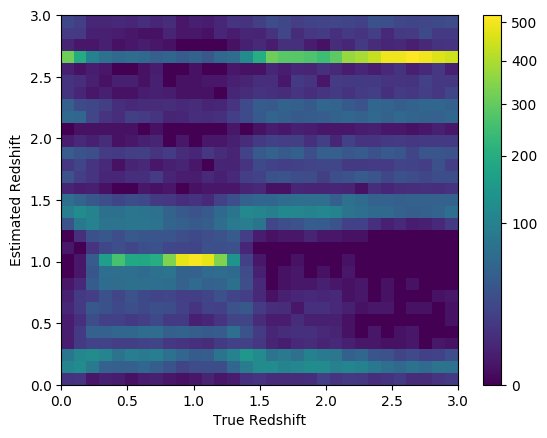

In [75]:
plt.hist2d(true_redshift, measured_redshift, bins=31, norm=npl.colors.PowerNorm(0.5))
plt.colorbar()
plt.xlabel('True Redshift')
plt.ylabel('Estimated Redshift')

In [76]:
accuracy = []
for redshift in np.arange(0, 3.01, 0.1):
    true_idx = np.where(true_redshift == redshift)[0]
    diff = measured_redshift[true_idx] - redshift
    correct_counts = len(np.where(diff == 0)[0])
    accuracy.append(correct_counts/1000)

Text(0.5, 1.0, 'Mean KL-Divergence = 0.3470825377581646')

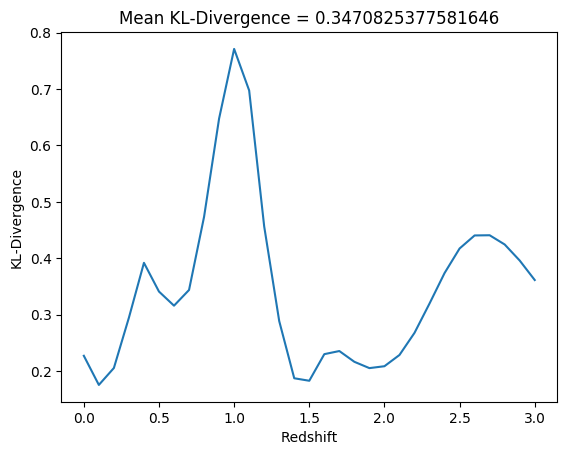

In [77]:
plt.plot(np.arange(0., 3.01, 0.1), kl_by_redshift)
plt.xlabel('Redshift')
plt.ylabel('KL-Divergence')
plt.title(f'Mean KL-Divergence = {np.mean(kl_by_redshift)}')

Text(0.5, 1.0, 'Correctly labeled photo-z in each redshift bin (Accuracy). Median accuracy = 0.03')

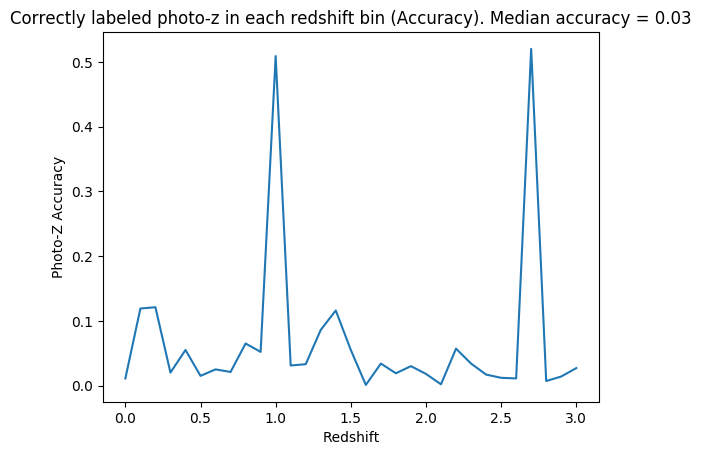

In [78]:
plt.plot(np.arange(0., 3.01, 0.1), accuracy)
plt.xlabel('Redshift')
plt.ylabel('Photo-Z Accuracy')
plt.title(f'Correctly labeled photo-z in each redshift bin (Accuracy). Median accuracy = {np.median(accuracy)}')

In [79]:
# measured_redshift = []
# for color_value in redshifted_colors:
#     color_probs = []
#     for gal in pdf_list:
#         color_probs.append(gal.pdf(color_value))
#     measured_redshift.append(np.random.choice(np.arange(0.0, 3.01, 0.1), p=color_probs/np.sum(color_probs)))
# measured_redshift = np.array(measured_redshift)

## Rerun now with m5 values 2 mags fainter

Now let's run with the same set of galaxies but we'll pretend that the seeing in each field was 2 magnitudes fainter. We won't change the galaxy magnitudes at all so we will still have r=24.5 but we'll pretend that the noise is a lot lower so our errors should be lower. This could happen if we had a lot more images of the galaxies so we could coadd the single images into a much better dataset.

In [80]:
from scipy.stats import norm
from copy import copy
g_r = []
g_r_err = []
pdf_list = []
r = 24.5
for redshift in np.arange(0,3.1,0.1):
    sun_copy = copy(sun)
    sun_copy.redshiftSED(redshift)
    mags = {}
    fluxNorm = sun_copy.calcFluxNorm(r, lsst['r'])
    sun_copy.multiplyFluxNorm(fluxNorm)
    mags = {}
    for f in filterlist:
        mags[f] = sun_copy.calcMag(lsst[f])
        pd.DataFrame(mags, index=['Distant Sun']).T
    gr_color = mags['g'] - mags['r']
    g_r.append(mags['g'] - mags['r'])
    mag_error_g, gamma = SignalToNoise.calcMagError_m5(mags['g'], lsst['g'], coaddM5Value(g_filter)+2, PhotometricParameters())
    mag_error_r, gamma = SignalToNoise.calcMagError_m5(mags['r'], lsst['r'], coaddM5Value(r_filter)+2, PhotometricParameters())
    g_r_err.append(np.sqrt(mag_error_r**2 + mag_error_g**2))
    gr_error = np.sqrt(mag_error_r**2 + mag_error_g**2)
    pdf_list.append(norm(loc = gr_color, scale = gr_error))
    
print(g_r, g_r_err)

[0.7254152168005632, 0.9092875263745306, 1.21556563554606, 1.5101335745430582, 1.7336961338800663, 1.6247841723966872, 1.564944229071827, 1.6311809361247, 1.8812287964095908, 2.127568839165825, 2.2677011843884642, 2.1867075250048273, 1.8528072436778764, 1.4936730257263982, 1.1240496109998404, 0.8557468597614317, 0.7198391764086622, 0.7096387142844485, 0.747772632412822, 0.7750666481098385, 0.7663830025511693, 0.7227059844917534, 0.6590263915621257, 0.5962345500838815, 0.5445307149382153, 0.508888128898807, 0.4915751575070537, 0.4913180779593205, 0.5034478075371531, 0.5257928424279541, 0.5554684677789687] [0.09174290815219048, 0.1012813113760201, 0.12161561828235505, 0.14760734082676738, 0.17247617507391905, 0.1597524591778727, 0.15325978565063134, 0.1604669304227407, 0.19171505944158676, 0.22956338351313674, 0.2546541527259636, 0.23981830540338925, 0.18782044554341373, 0.1459631567236277, 0.11489371261633155, 0.09831697712246046, 0.09148088947053332, 0.09100548699846343, 0.092808858620

In [81]:
combined_pdf_m5plus2 = combine_pdfs(pdf_list, color_range)

In [82]:
kl_by_redshift_m5plus2 = []
for gal in pdf_list:
    kl_by_redshift_m5plus2.append(np.sum(kl_div(0.01*gal.pdf(color_range), 0.01*combined_pdf)))

### Create a simulated dataset with new errors

Now let's create a new set of simulated galaxies with new error values. We aren't changing the magnitudes of the galaxies remember, we've only changed how much noise there is in the measurement. Once again we will sample 1000 galaxies from each of the PDFs we calculated for each redshift.

The PDFs are all plotted here and the combined PDF that represents the probability across all redshifts is shown.

Text(0.5, 1.0, 'PDFs at all redshifts and the combined PDF')

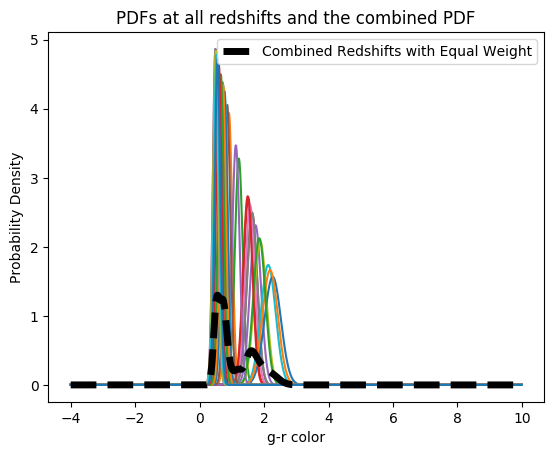

In [83]:
for gal in pdf_list:
    plt.plot(color_range, gal.pdf(color_range))# label = 'Minimum KL, z=1.4')
#plt.plot(color_range, gal_z_0p5.pdf(color_range), label = 'z=0.5')
#plt.plot(color_range, gal_z_1p0.pdf(color_range), label = 'z=1.0')
plt.plot(color_range, combined_pdf_m5plus2, '--', c='k', lw=5, label='Combined Redshifts with Equal Weight')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()
plt.title('PDFs at all redshifts and the combined PDF')

Here is an example of drawing 1000 galaxies from the z=0 PDF and showing how it matches the distribution.

In [84]:
# From each redshifted galaxy draw 1000 samples
gal_colors = pdf_list[0].rvs(1000)

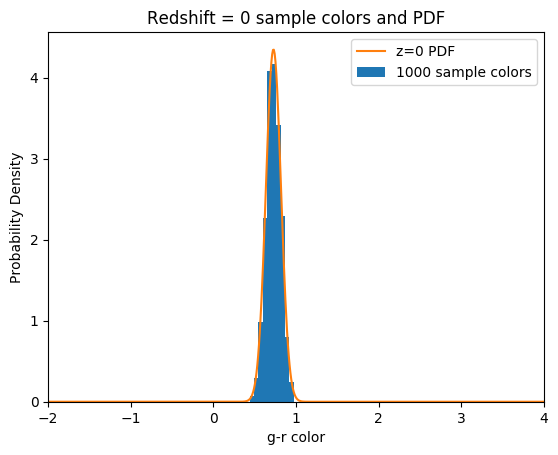

In [85]:
plt.hist(gal_colors, density=True, label='1000 sample colors') # Density=True turns the histogram into a PDF by normalizing the values
plt.plot(color_range, pdf_list[0].pdf(color_range), label='z=0 PDF')
plt.xlim(-2, 4)
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.title('Redshift = 0 sample colors and PDF')
plt.legend()

Now we will do it for all the redshifts and plot the results compared to our new combined PDF.

In [86]:
redshifted_colors_m5plus2 = []
true_redshifts = []
for gal, redshift in zip(pdf_list, np.arange(0, 3.01, 0.1)):
    gal_colors = gal.rvs(1000)
    redshifted_colors_m5plus2.append(gal_colors)
    true_redshifts.append(np.ones(1000)*redshift)
true_redshift = np.array(true_redshifts).flatten()
redshifted_colors_m5plus2 = np.array(redshifted_colors_m5plus2).flatten()

Text(0.5, 1.0, 'Sample Catalog and PDF compared')

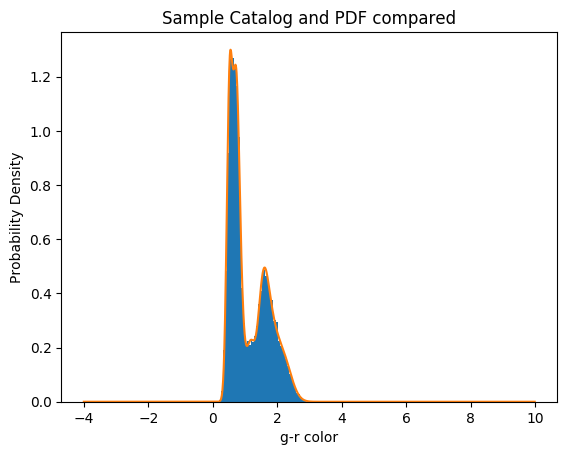

In [87]:
plt.hist(redshifted_colors_m5plus2, density=True, bins=50, label='Sample catalog of colors')
plt.plot(color_range, combined_pdf_m5plus2, label='Combined PDF')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.title('Sample Catalog and PDF compared')

What does this catalog look like by redshift?

Let's plot all the colors at the different redshifts and see.

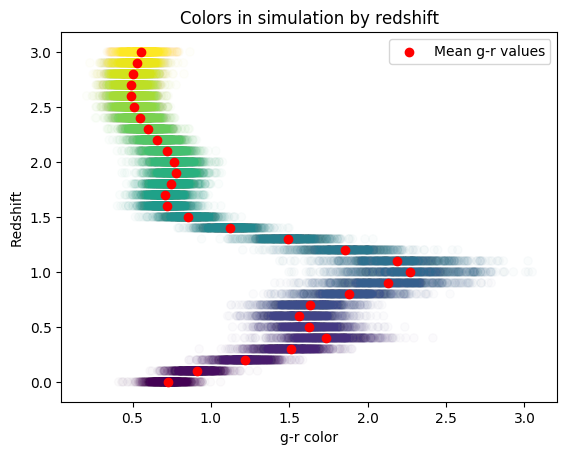

In [88]:
cm = plt.cm.get_cmap('viridis')
for idx, redshift in enumerate(np.arange(0, 3.01, 0.1)):
    sc = plt.scatter(redshifted_colors_m5plus2[idx*1000:(idx+1)*1000], np.ones(1000)*redshift, vmin=0, vmax=3.0, alpha=0.02, c=np.ones(1000)*redshift, cmap=cm)
plt.scatter(g_r, known_redshifts, c='r', label='Mean g-r values')
#plt.colorbar(sc, label='Redshift', alpha=1.0)
plt.xlabel('g-r color')
plt.ylabel('Redshift')
plt.title('Colors in simulation by redshift')
plt.legend()

Let's directly compare it to the previous catalog.

(-1.5, 5.5)

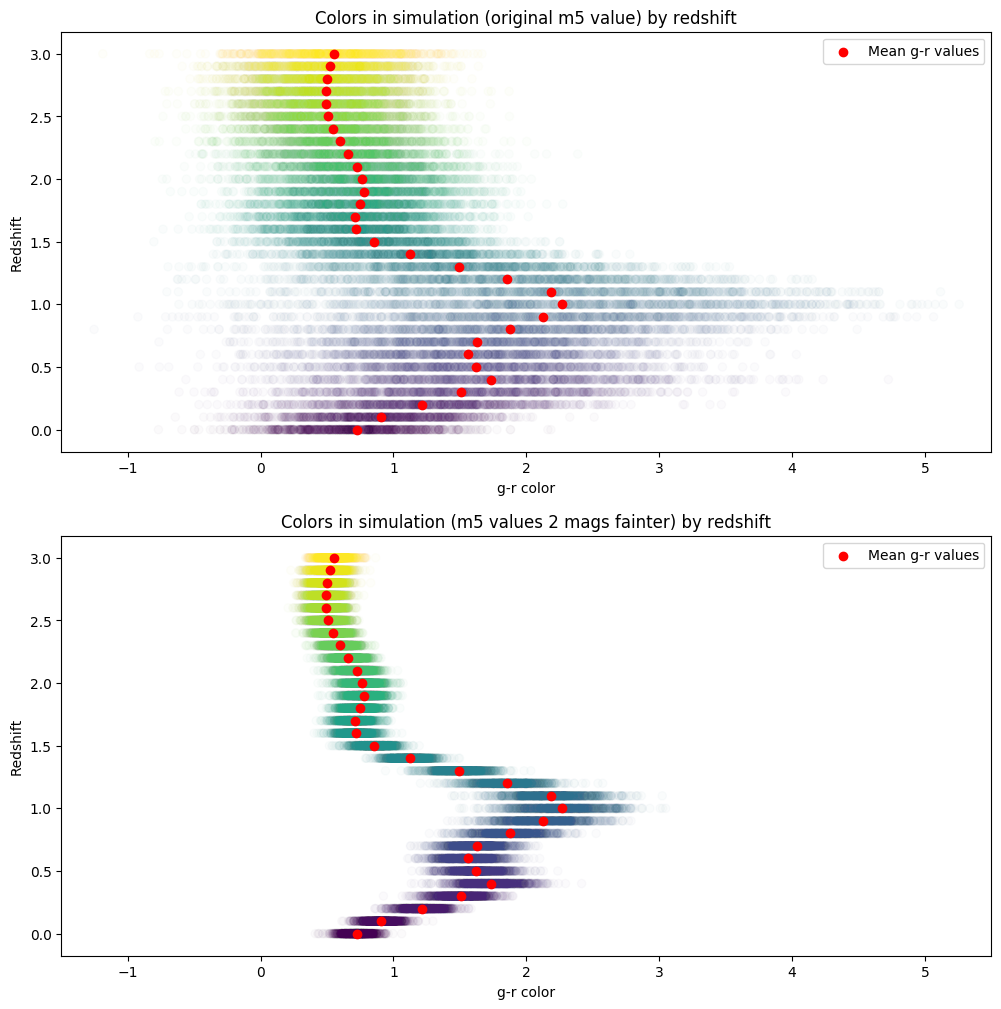

In [89]:
cm = plt.cm.get_cmap('viridis')
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(2,1,1)
for idx, redshift in enumerate(np.arange(0, 3.01, 0.1)):
    sc = plt.scatter(redshifted_colors[idx*1000:(idx+1)*1000], np.ones(1000)*redshift, vmin=0, vmax=3.0, alpha=0.02, c=np.ones(1000)*redshift, cmap=cm)
plt.scatter(g_r, known_redshifts, c='r', label='Mean g-r values')
#plt.colorbar(sc, label='Redshift', alpha=1.0)
plt.xlabel('g-r color')
plt.ylabel('Redshift')
plt.title('Colors in simulation (original m5 value) by redshift')
plt.legend()
plt.xlim(-1.5, 5.5)

fig.add_subplot(2,1,2)
for idx, redshift in enumerate(np.arange(0, 3.01, 0.1)):
    sc = plt.scatter(redshifted_colors_m5plus2[idx*1000:(idx+1)*1000], np.ones(1000)*redshift, vmin=0, vmax=3.0, alpha=0.02, c=np.ones(1000)*redshift, cmap=cm)
plt.scatter(g_r, known_redshifts, c='r', label='Mean g-r values')
#plt.colorbar(sc, label='Redshift', alpha=1.0)
plt.xlabel('g-r color')
plt.ylabel('Redshift')
plt.title('Colors in simulation (m5 values 2 mags fainter) by redshift')
plt.legend()
plt.xlim(-1.5, 5.5)

See that we have the exact same mean g-r colors but because of the smaller error distributions we have a much narrower range of possible colors for each redshift. In the first simulation there's a very vague structure but all of the distributions have some overlap with one another. In the second example the structure is much clearer and if we draw straight lines up through the plot at specific color we have a very limited range of redshifts that correspond to that color, especially when g-r > 1.0 which really sets the redshifts from 0.2 - 1.4 apart. This range of redshifts is where that 4000 angstrom break (Balmer break) is passing in between the g and r filters as you can see below.

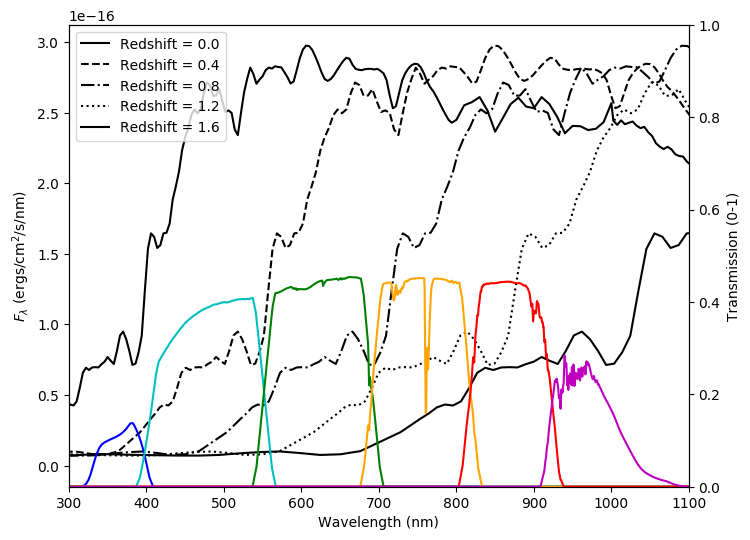

In [90]:
# Let's see what the SED and throughputs look like together
fig = plt.figure(figsize=(8,6))
filtercolors = {'u':'b', 'g':'c', 'r':'g', 'i':'orange', 'z':'r', 'y':'m'}
linestyle = ['-', '--', '-.', ':', '-']

ax1 = plt.subplot(1,1,1)
ax2 = ax1.twinx()
for f in filterlist:
    ax2.plot(lsst[f].wavelen, lsst[f].sb, color=filtercolors[f])
for r_shift, ls in zip([0.0, 0.4, 0.8, 1.2, 1.6], linestyle):
    sun_copy = copy(sun)
    sun_copy.redshiftSED(r_shift)
    ax1.plot(sun_copy.wavelen, sun_copy.flambda, color='k', label=f'Redshift = {r_shift}', ls=ls)
plt.xlim(300, 1100)
ax1.set_xlabel('Wavelength (nm)')
ax2.set_ylabel('Transmission (0-1)')
ax2.set_ylim(0, 1)
ax1.set_ylabel('$F_\lambda$ (ergs/cm$^2$/s/nm)')
ax1.legend(loc=2)

## Run a simple photometric redshift estimation

Once again we run our simple nearest neighbor photo-z algorithm here.

In [91]:
# Set up our nearest neighbor estimator
from sklearn.neighbors import NearestNeighbors
redshift_estimator = NearestNeighbors(n_neighbors=1).fit(np.array(g_r).reshape(-1, 1))

In [92]:
measured_redshift_m5plus2 = []
known_redshifts = np.arange(0, 3.01, 0.1)
estimated_idx = redshift_estimator.kneighbors(redshifted_colors_m5plus2.reshape(-1, 1), return_distance=False)
measured_redshift_m5plus2 = np.array([known_redshifts[idx] for idx in estimated_idx]).flatten()

Text(0, 0.5, 'Estimated Redshift')

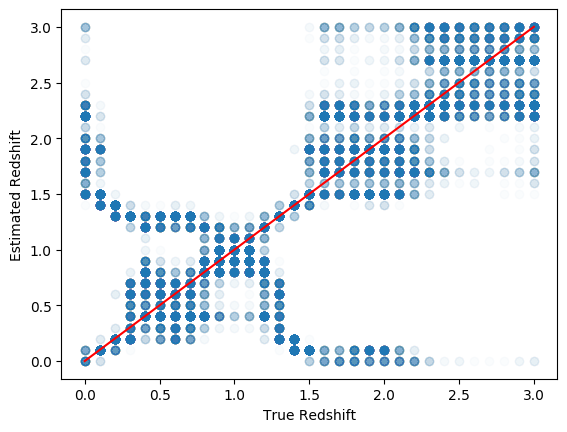

In [93]:
plt.scatter(true_redshift, measured_redshift_m5plus2, alpha=0.02)
plt.plot(np.arange(0, 3.01, 0.1), np.arange(0, 3.01, 0.1), c='r', label='True = Estimated')
plt.xlabel('True Redshift')
plt.ylabel('Estimated Redshift')

Text(0, 0.5, 'Estimated Redshift')

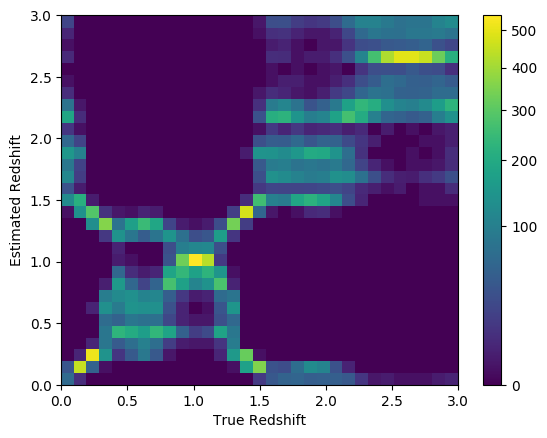

In [94]:
plt.hist2d(true_redshift, measured_redshift_m5plus2, bins=31, norm=npl.colors.PowerNorm(0.5))
plt.colorbar()
plt.xlabel('True Redshift')
plt.ylabel('Estimated Redshift')

In [95]:
accuracy_m5plus2 = []
for redshift in np.arange(0, 3.01, 0.1):
    true_idx = np.where(true_redshift == redshift)[0]
    diff = measured_redshift_m5plus2[true_idx] - redshift
    correct_counts = len(np.where(diff == 0)[0])
    accuracy_m5plus2.append(correct_counts/1000)

Text(0.5, 1.0, 'Mean KL-Divergence = 1.6192559504104866')

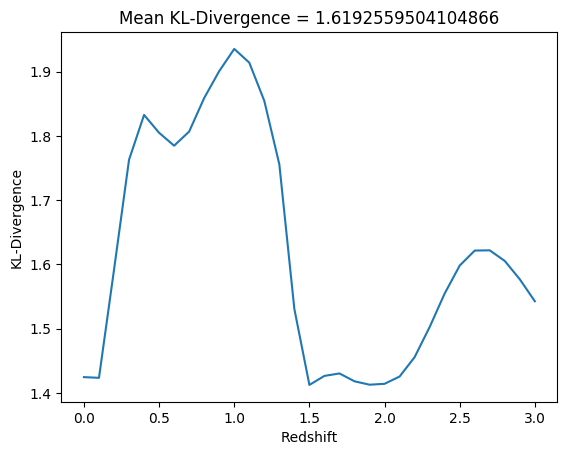

In [96]:
plt.plot(np.arange(0., 3.01, 0.1), kl_by_redshift_m5plus2)
plt.xlabel('Redshift')
plt.ylabel('KL-Divergence')
plt.title(f'Mean KL-Divergence = {np.mean(kl_by_redshift_m5plus2)}')

Text(0.5, 1.0, 'Correctly labeled photo-z in each redshift bin (Accuracy). Median accuracy = 0.125')

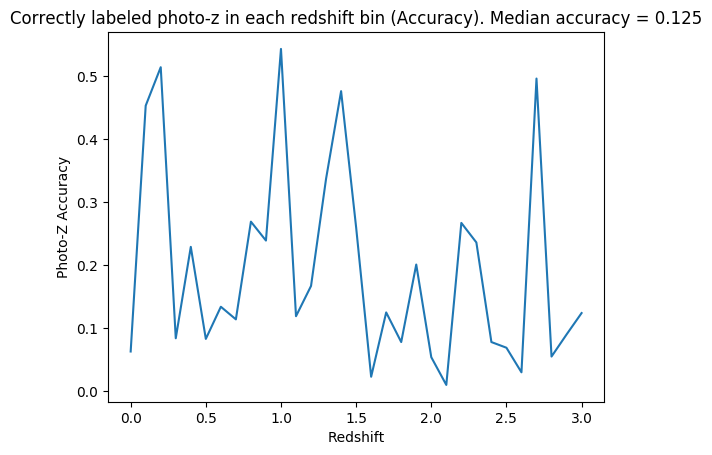

In [97]:
plt.plot(np.arange(0., 3.01, 0.1), accuracy_m5plus2)
plt.xlabel('Redshift')
plt.ylabel('Photo-Z Accuracy')
plt.title(f'Correctly labeled photo-z in each redshift bin (Accuracy). Median accuracy = {np.median(accuracy_m5plus2)}')

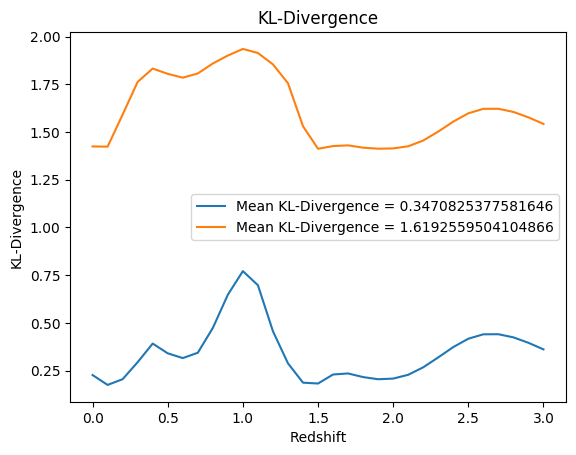

In [101]:
fig = plt.figure()
plt.plot(np.arange(0., 3.01, 0.1), kl_by_redshift, label=f'Mean KL-Divergence = {np.mean(kl_by_redshift)}')
plt.plot(np.arange(0., 3.01, 0.1), kl_by_redshift_m5plus2, label=f'Mean KL-Divergence = {np.mean(kl_by_redshift_m5plus2)}')
plt.xlabel('Redshift')
plt.ylabel('KL-Divergence')
plt.title(f'KL-Divergence')
plt.legend()